In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

The data set has 32560 rows and 15 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data types in the data set are integer and object data types.

All the columns has 32560 non-null values.No null value present in the dataset.

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The data set has integer and object data types.

Integer - Age,fnlwgt,Education_num,Capital_gain,Capital_loss and Hours_per_week.

Object _ Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country and Income.

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [9]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Need to replace the ' ?' in Workclass,Occupation and Native_country.

In [10]:
#Checking which one is most frequently occuring in Workclass,Occupation and Native_country.
print(df['Workclass'].mode())
print(df['Occupation'].mode())
print(df['Native_country'].mode())

0     Private
dtype: object
0     Prof-specialty
dtype: object
0     United-States
dtype: object


In [11]:
#Replacing the ' ?'  in Workclass,Occupation and Native_country.
df['Workclass']=df['Workclass'].replace(' ?',' Private')
df['Occupation']=df['Occupation'].replace(' ?',' Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?',' United-States')

In [12]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

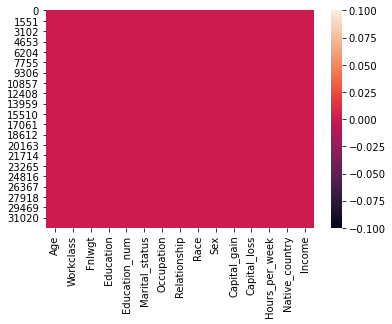

In [13]:
sns.heatmap(df.isnull())

No null value present in the data set.

In [14]:
#Statistics summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


All columns has 32560 counts.

There is huge difference between Max and 75th percentile in Capital_gain and Capital_loss.

Mean is greater than median in Capital_gain and Capital_loss.

In [15]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

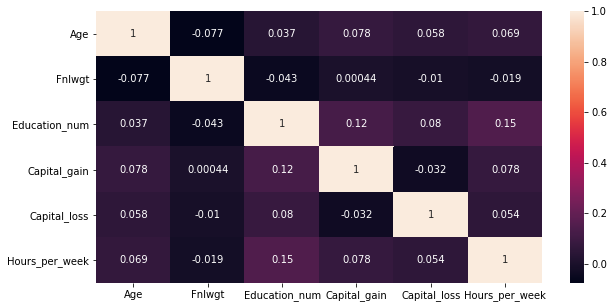

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

Age is positively correlated to Education_num,Capital_gain,Capital_loss and Hours_per_week. Age and Fnlwgt is negative correlated.

Capital_gain and Education_num is postively correlated.

Hours_per_week and Education_num is positively correlated.

Data Visualization

In [17]:
cat=df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']]
con=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

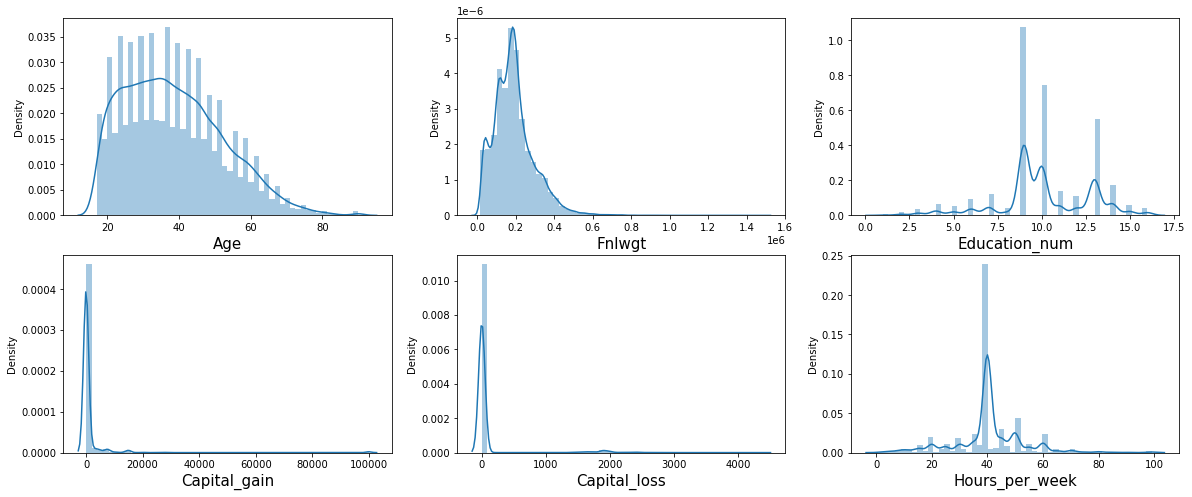

In [18]:
plt.figure(figsize=(20,8))
plotnumber=1

for i in con:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [19]:
#Checking Skewness
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Skewness in Capital_gain and Capital_loss.

In [20]:
#Removing Skewness
df['Capital_gain']=np.sqrt(df['Capital_gain'])
df['Capital_loss']=np.sqrt(df['Capital_loss'])

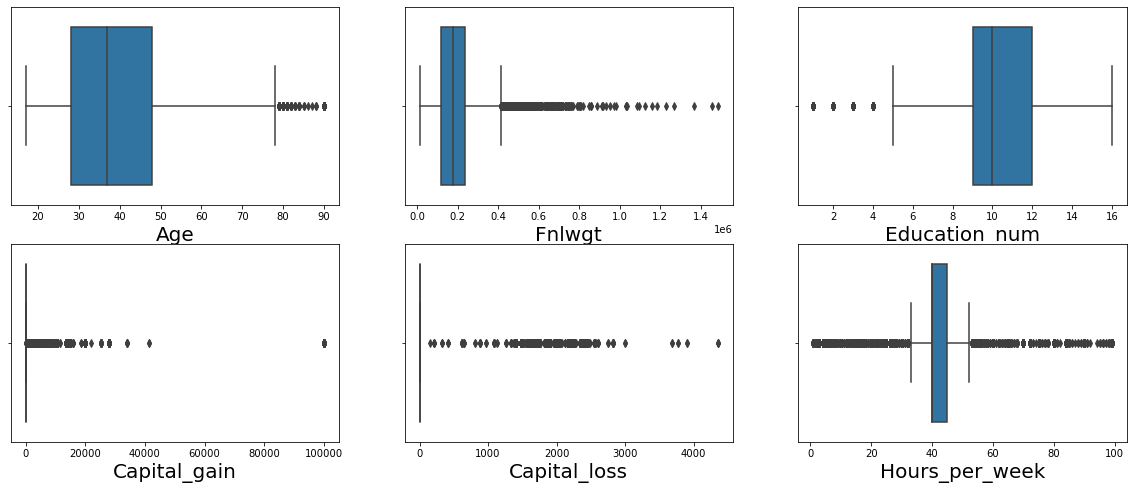

In [21]:
#Checking outliers
plt.figure(figsize=(20,8))
plotnumber=1

for i in con:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in Age,Fnlwgt,Education_num,Capital_gain,Capital_loss and Hours_per_week.

In [22]:
cat.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

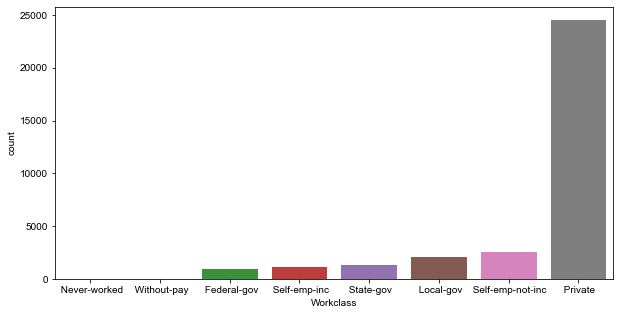

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['Workclass'],order=df['Workclass'].value_counts().sort_values().index)
sns.set(style='whitegrid')
df['Workclass'].value_counts()

More people working in the private workclass,less people working in the government and self-emp.Very less amount people working without pay.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

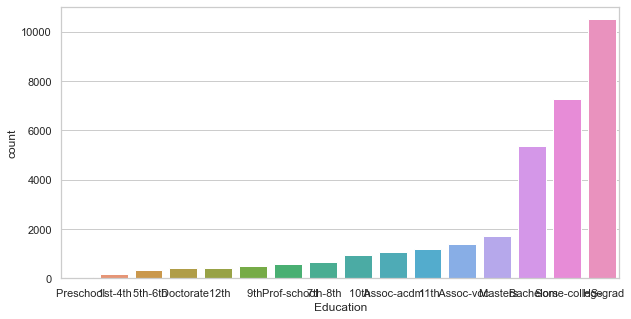

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['Education'],order=df['Education'].value_counts().sort_values().index)
df['Education'].value_counts()

In [25]:
#Replacing the 1st to 10th and preschool as school.11th,12th,HS-grad as High School.Some-college,Assoc-voc,Assoc-acdm and Prof-school as higher.Bachelors as UG,Masters as PG and Doctorate as DR.
df['Education']=df['Education'].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th'],'School')
df['Education']=df['Education'].replace([' 11th',' 12th',' HS-grad'],'High school')
df['Education']=df['Education'].replace([' Some-college',' Assoc-voc',' Assoc-acdm',' Prof-school'],'Higher')
df['Education']=df['Education'].replace(' Bachelors','UG')
df['Education']=df['Education'].replace(' Masters','PG')
df['Education']=df['Education'].replace(' Doctorate','DR')

High school    12109
Higher         10316
UG              5354
School          2645
PG              1723
DR               413
Name: Education, dtype: int64

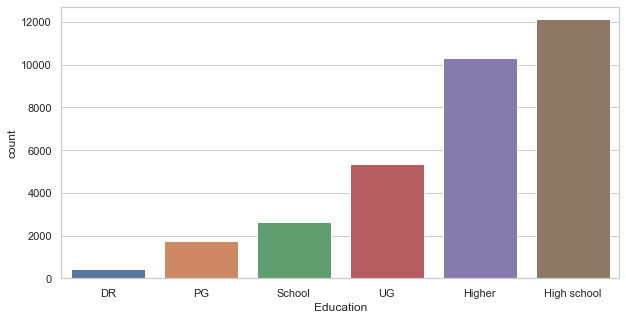

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(df['Education'],order=df['Education'].value_counts().sort_values().index)
df['Education'].value_counts()

More people completed the High school and Higher. Less people in PG and DR.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

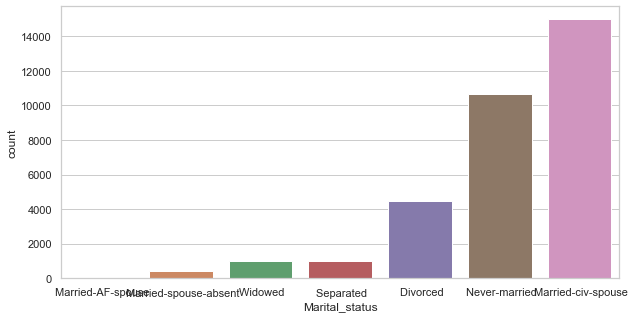

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['Marital_status'],order=df['Marital_status'].value_counts().sort_values().index)
df['Marital_status'].value_counts()

In [28]:
#Rearranging the values
df['Marital_status']=df['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Married')
df['Marital_status']=df['Marital_status'].replace(' Never-married','Unmarried')
df['Marital_status']=df['Marital_status'].replace([' Divorced',' Separated',' Widowed',' Married-spouse-absent'],'Others')

Married      14999
Unmarried    10682
Others        6879
Name: Marital_status, dtype: int64

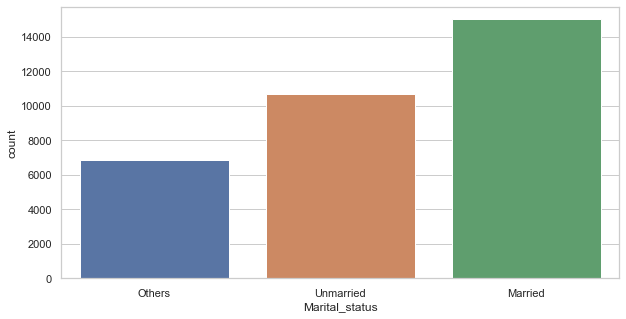

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df['Marital_status'],order=df['Marital_status'].value_counts().sort_values().index)
df['Marital_status'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

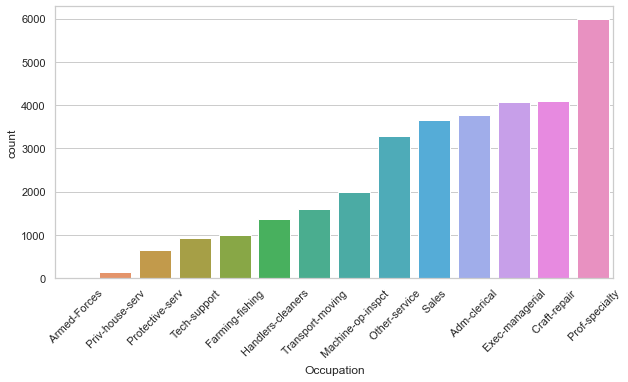

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df['Occupation'],order=df['Occupation'].value_counts().sort_values().index)
plt.xticks(rotation='45')
df['Occupation'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

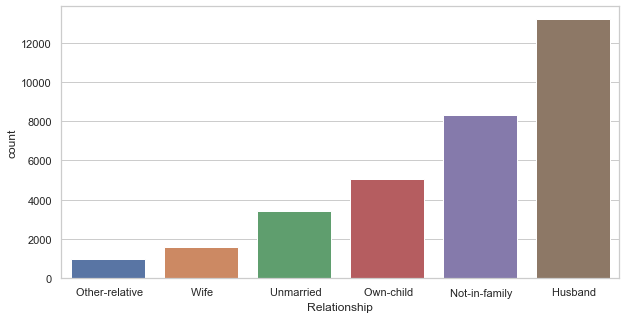

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(df['Relationship'],order=df['Relationship'].value_counts().sort_values().index)
df['Relationship'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

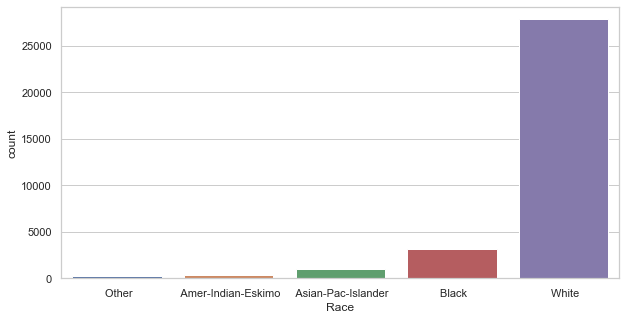

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df['Race'],order=df['Race'].value_counts().sort_values().index)
df['Race'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

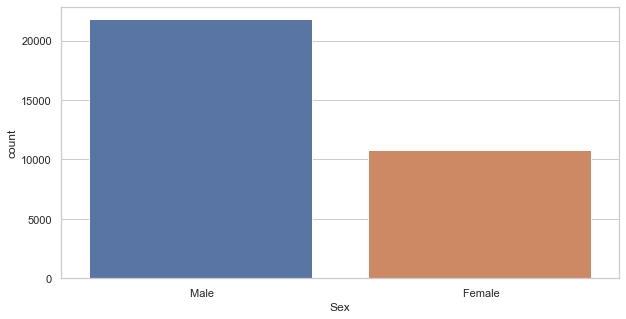

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
df['Sex'].value_counts()

The count of Male is higher than Female.

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

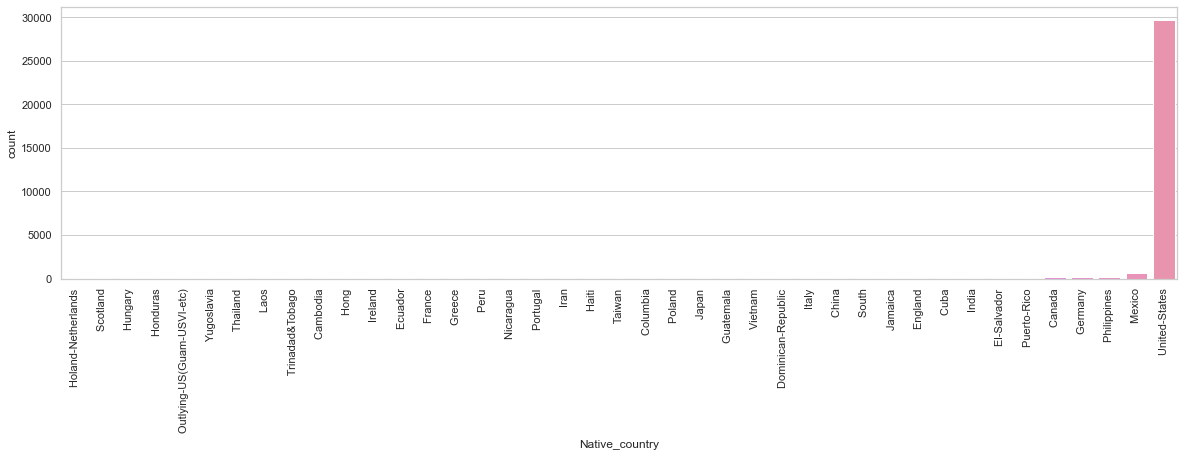

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(df['Native_country'],order=df['Native_country'].value_counts().sort_values().index)
plt.xticks(rotation='90')
df['Native_country'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

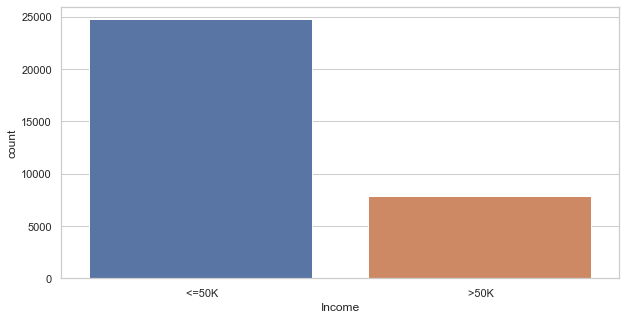

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df['Income'])
df['Income'].value_counts()

Income of 24719 person is less than 50K and Income of 7841 person is greater than 50k.

<AxesSubplot:xlabel='Income', ylabel='count'>

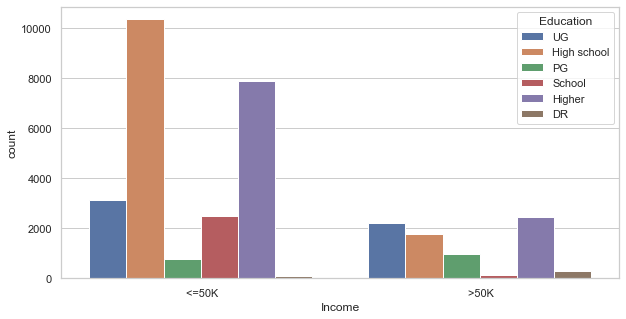

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Education',data=df)

Majority people with education in Highschool,Higher and UG is getting income below 50k.

Small amount of people with education in Higher,UG,PG and DR is getting income higher than 50k.

<AxesSubplot:xlabel='Income', ylabel='count'>

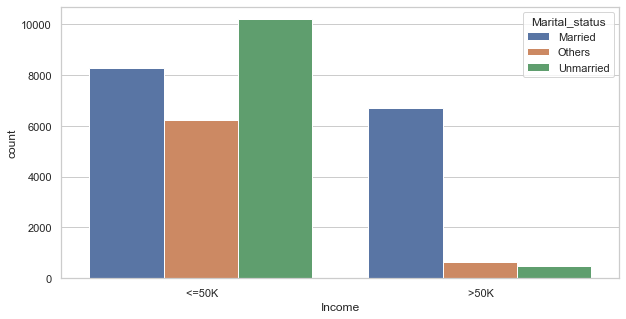

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Marital_status',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

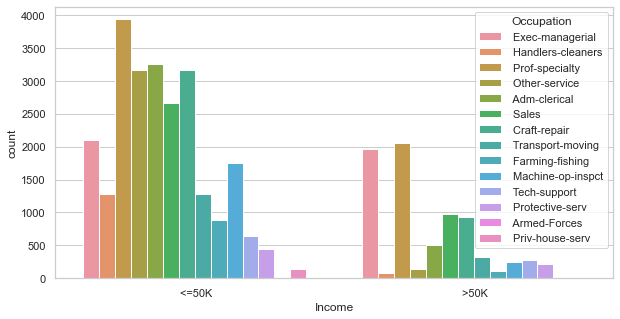

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Occupation',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

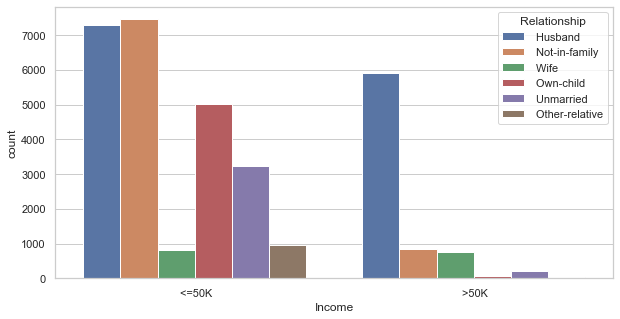

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Relationship',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

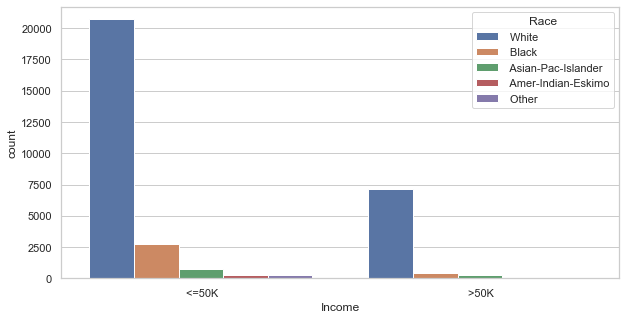

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Race',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

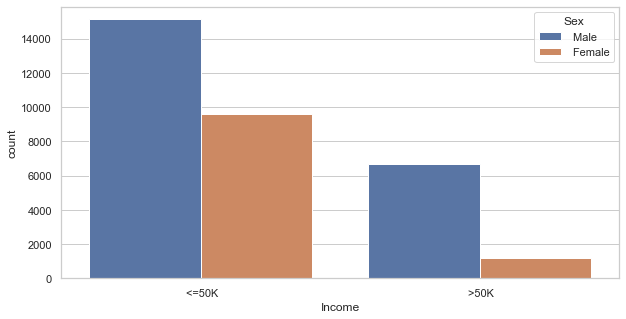

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Education_num'>

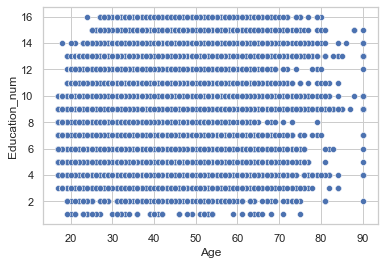

In [42]:
sns.scatterplot(x='Age',y='Education_num',data=df)

<AxesSubplot:xlabel='Age', ylabel='Capital_gain'>

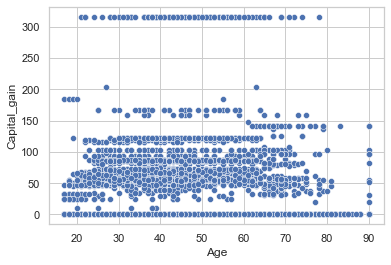

In [43]:
sns.scatterplot(x='Age',y='Capital_gain',data=df)

<AxesSubplot:xlabel='Age', ylabel='Capital_loss'>

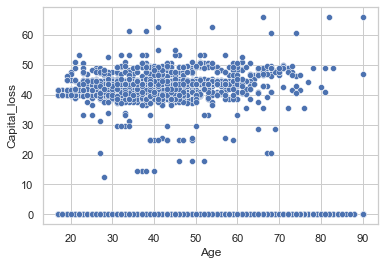

In [44]:
sns.scatterplot(x='Age',y='Capital_loss',data=df)

<AxesSubplot:xlabel='Capital_gain', ylabel='Capital_loss'>

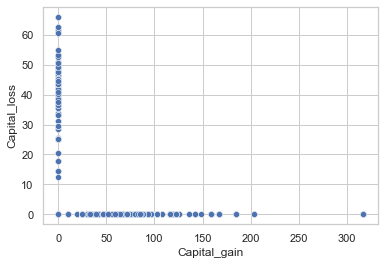

In [45]:
sns.scatterplot(x='Capital_gain',y='Capital_loss',data=df)

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

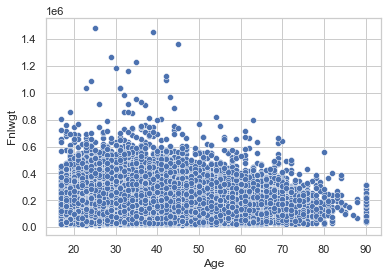

In [46]:
sns.scatterplot(x='Age',y='Fnlwgt',data=df)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

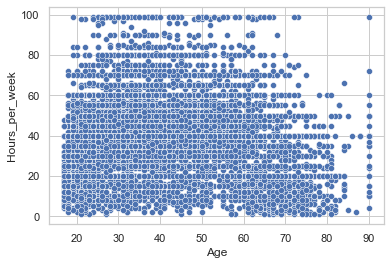

In [47]:
sns.scatterplot(x='Age',y='Hours_per_week',data=df)

<AxesSubplot:xlabel='Capital_gain', ylabel='Hours_per_week'>

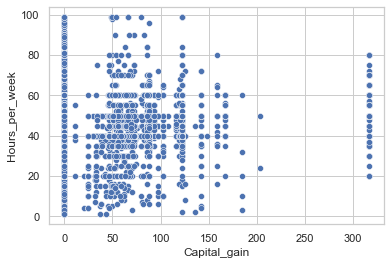

In [48]:
sns.scatterplot(x='Capital_gain',y='Hours_per_week',data=df)

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

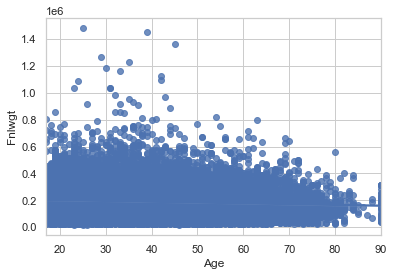

In [49]:
sns.regplot(x='Age',y='Fnlwgt',data=df)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

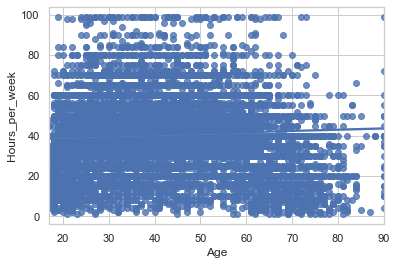

In [50]:
sns.regplot(x='Age',y='Hours_per_week',data=df)

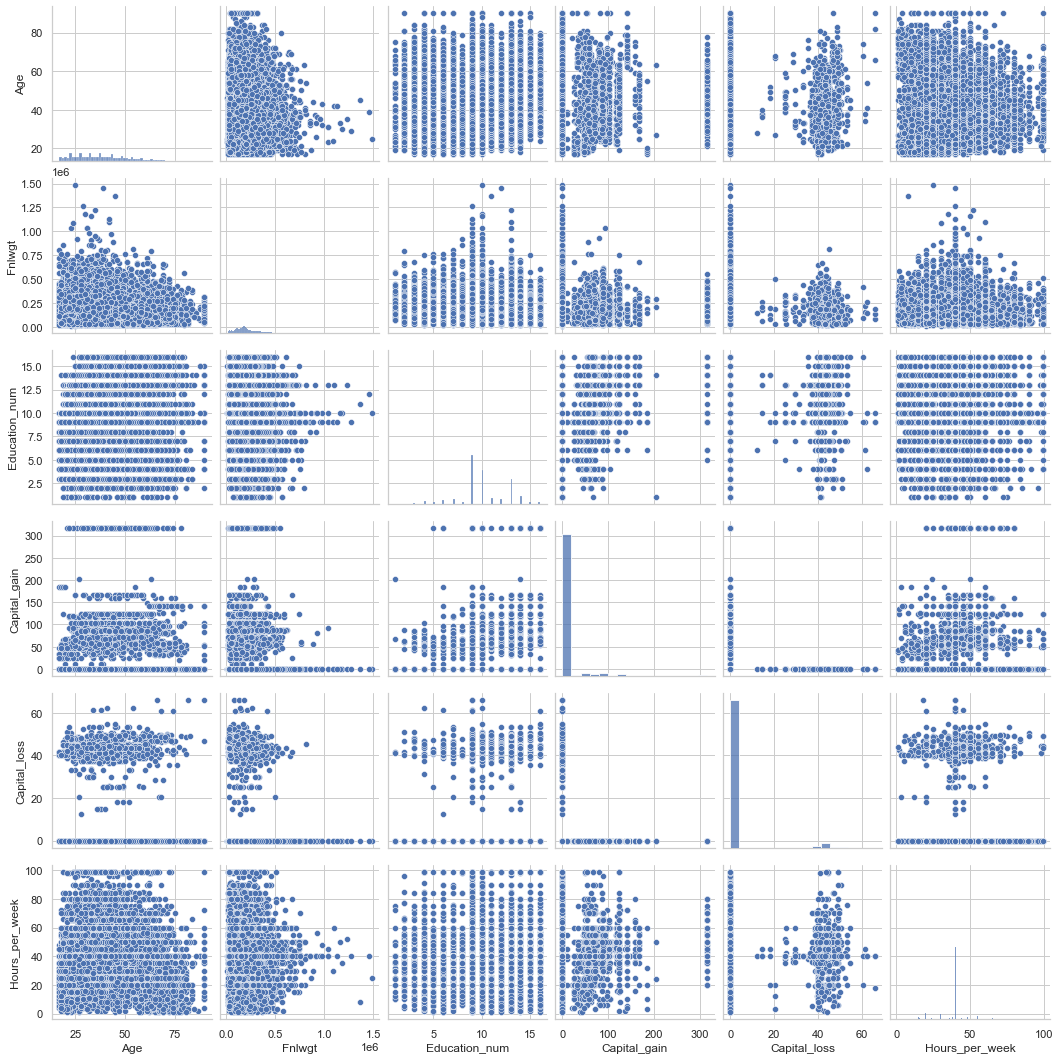

In [51]:
sns.pairplot(df)

In [52]:
#Encoding the categorical columns
Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [53]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,5,13,0,3,0,4,1,0.0,0.0,13,38,0
1,38,3,215646,1,9,1,5,1,4,1,0.0,0.0,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,0.0,0.0,40,38,0
3,28,3,338409,5,13,0,9,5,2,0,0.0,0.0,40,4,0
4,37,3,284582,3,14,0,3,5,4,0,0.0,0.0,40,38,0


<AxesSubplot:>

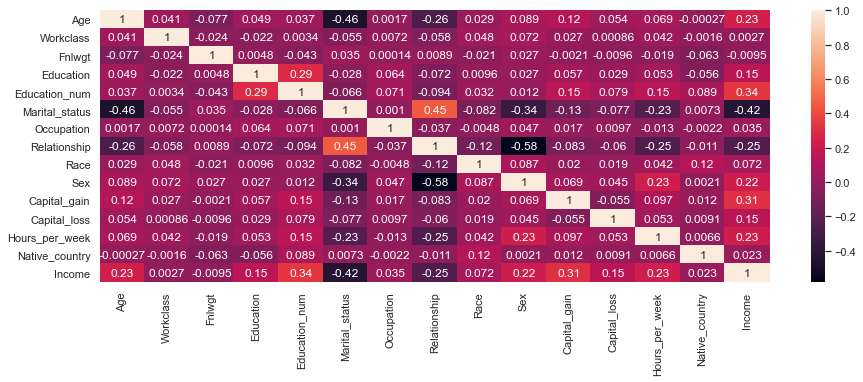

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

The Income is positively correlated to Age,Workclass,Education,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week and Native_country.

Income negatively correlated to Fnlwgt,Marital_status and Relationship.

In [55]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([    3,     7,     9, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 12, ...,  8,  8, 10], dtype=int64))


In [56]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (27310, 15)


In [57]:
dataloss=((32560-27310)/32560)*100
dataloss

16.124078624078624

16.1% Data loss after the outliers removal.

In [58]:
# Separating dependent and independent variables

X=df.drop('Income',axis=1)
Y=df['Income']
print(X.shape)
print(Y.shape)

(27310, 14)
(27310,)


In [59]:
Y.value_counts()

0    21524
1     5786
Name: Income, dtype: int64

Y is imbalanced.need to balance.

In [60]:
#concatenate training data back together
from sklearn.utils import resample

X=pd.concat([X,Y],axis=1)

L=X[X.Income==0]
H=X[X.Income==1]

#downsampling
down=resample(L,replace=True, n_samples=len(H), random_state=25)

#Combine majority and minority
down=pd.concat([H,down])

In [61]:
down.Income.value_counts()

0    5786
1    5786
Name: Income, dtype: int64

In [62]:
X=down.drop('Income',axis=1)
Y=down['Income']
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
6,52,5,209642,1,9,0,3,0,4,1,0.000000,0.0,45,38
8,42,3,159449,5,13,0,3,0,4,1,71.958321,0.0,40,38
18,43,5,292175,3,14,1,3,4,4,0,0.000000,0.0,45,38
19,40,3,193524,0,16,0,9,0,4,1,0.000000,0.0,60,38
24,56,1,216851,5,13,0,12,0,4,1,0.000000,0.0,40,38


In [63]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,13.506322,Age
1,7.880136,Workclass
2,4.799839,Fnlwgt
3,4.206798,Education
4,24.818469,Education_num
5,2.327874,Marital_status
6,3.464847,Occupation
7,2.981065,Relationship
8,45.612741,Race
9,6.684416,Sex


Multicollinearity present in Age,Education_num,Race,Hours_per_week and Native_country.

In [64]:
#Dropping Native_country.
X=X.drop(['Native_country'],axis=1)

In [65]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 0.94343789,  1.64169415,  0.26423032, ..., -0.3258084 ,
        -0.03413443,  0.31999559],
       [ 0.15164032, -0.06550253, -0.2722959 , ...,  2.74083456,
        -0.03413443, -0.13736681],
       [ 0.23082008,  1.64169415,  1.14644732, ..., -0.3258084 ,
        -0.03413443,  0.31999559],
       ...,
       [-1.35277507, -0.06550253, -0.22503866, ..., -0.3258084 ,
        -0.03413443, -0.13736681],
       [-1.59031434, -0.06550253, -0.96800662, ..., -0.3258084 ,
        -0.03413443, -1.96681643],
       [ 0.38917959, -0.06550253, -0.01956963, ..., -0.3258084 ,
        -0.03413443, -0.13736681]])

In [66]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [67]:
#Train test splitting
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.8287821177555018

In [68]:
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix :',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.814725198755617
Confusion matrix : [[1055  381]
 [ 155 1302]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.73      0.80      1436
           1       0.77      0.89      0.83      1457

    accuracy                           0.81      2893
   macro avg       0.82      0.81      0.81      2893
weighted avg       0.82      0.81      0.81      2893



In [69]:
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.8042401198294734

In [70]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.8043553404770135
Confusion matrix : [[1089  347]
 [ 219 1238]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1436
           1       0.78      0.85      0.81      1457

    accuracy                           0.80      2893
   macro avg       0.81      0.80      0.80      2893
weighted avg       0.81      0.80      0.80      2893



In [71]:
#KNN
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8562046318700312

In [72]:
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.8015900449360526
Confusion matrix : [[1094  342]
 [ 232 1225]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1436
           1       0.78      0.84      0.81      1457

    accuracy                           0.80      2893
   macro avg       0.80      0.80      0.80      2893
weighted avg       0.80      0.80      0.80      2893



In [73]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.99988477935246

In [74]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.773591427583823
Confusion matrix : [[1122  314]
 [ 341 1116]]
Classification report :               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1436
           1       0.78      0.77      0.77      1457

    accuracy                           0.77      2893
   macro avg       0.77      0.77      0.77      2893
weighted avg       0.77      0.77      0.77      2893



In [75]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.99988477935246

In [76]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8309713100587626
Confusion matrix : [[1160  276]
 [ 213 1244]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1436
           1       0.82      0.85      0.84      1457

    accuracy                           0.83      2893
   macro avg       0.83      0.83      0.83      2893
weighted avg       0.83      0.83      0.83      2893



In [77]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.8245189537965203

In [78]:
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.8181818181818182
Confusion matrix : [[1111  325]
 [ 201 1256]]
Classification report :               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1436
           1       0.79      0.86      0.83      1457

    accuracy                           0.82      2893
   macro avg       0.82      0.82      0.82      2893
weighted avg       0.82      0.82      0.82      2893



In [79]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.840995506394746

In [80]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8230210853784998
Confusion matrix : [[1108  328]
 [ 184 1273]]
Classification report :               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1436
           1       0.80      0.87      0.83      1457

    accuracy                           0.82      2893
   macro avg       0.83      0.82      0.82      2893
weighted avg       0.83      0.82      0.82      2893



Cross Validation

In [81]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.81544842 0.81540057 0.81358569]
0.8148115592067349


In [82]:
#Logistic regression
score=cross_val_score(lg,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.80196993 0.80321493 0.79725175]
0.8008122055196086


In [83]:
#KNN
score=cross_val_score(knn,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.79600829 0.79958517 0.79543687]
0.7970101107687794


In [84]:
#DTC
score=cross_val_score(dtc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.7651633  0.76613949 0.78843661]
0.7732464641520141


In [85]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.82996371 0.82628986 0.83199378]
0.829415783967525


In [86]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.82322447 0.81436349 0.81591911]
0.817835690565324


In [87]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.8278901  0.82525279 0.8301789 ]
0.8277739270505146


Hyperparameter Tuning

In [88]:
#SVC
grid_para={'C':[0.1,0.001,1.0,1.5,2,2.8],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid'],'tol':[0.5,1,1.5,2,2.5]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2, 2.8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [89]:
best_para=grid_search.best_params_
print(best_para)

{'C': 2.8, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.5}


In [90]:
svc=SVC(C=2.8,gamma='scale',kernel='rbf',tol=0.5) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.8167991704113378
Confusion matrix [[1064  372]
 [ 158 1299]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1436
           1       0.78      0.89      0.83      1457

    accuracy                           0.82      2893
   macro avg       0.82      0.82      0.82      2893
weighted avg       0.82      0.82      0.82      2893



In [91]:
#Logistic Regression
grid_para={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.001,1.0,1.5,2.8],'solver':['newton-cg','lbfgs','sag','saga'],'multi_class':['auto','ovr','multinomial'],'max_iter':range(2,20,1)}
grid_search=GridSearchCV(estimator=lg,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'max_iter': range(2, 20),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [92]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1.0, 'max_iter': 2, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag'}


In [93]:
lg=LogisticRegression(C=1.0,max_iter=2,multi_class='ovr',penalty='l2',solver='sag') 
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.8002073971655721
Confusion matrix [[1067  369]
 [ 209 1248]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.74      0.79      1436
           1       0.77      0.86      0.81      1457

    accuracy                           0.80      2893
   macro avg       0.80      0.80      0.80      2893
weighted avg       0.80      0.80      0.80      2893



In [98]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'leaf_size':range(1,20,1)}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [99]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'leaf_size': 1, 'weights': 'distance'}


In [100]:
knn=KNeighborsClassifier(algorithm='auto',weights='distance',leaf_size=1)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.8109229173867957
Confusion matrix : [[1139  297]
 [ 250 1207]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1436
           1       0.80      0.83      0.82      1457

    accuracy                           0.81      2893
   macro avg       0.81      0.81      0.81      2893
weighted avg       0.81      0.81      0.81      2893



In [104]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                              max_features='log2',
                                              min_samples_split=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [105]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [106]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='auto',min_samples_split=2,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.7939854821984099
Confusion matrix : [[1060  376]
 [ 220 1237]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1436
           1       0.77      0.85      0.81      1457

    accuracy                           0.79      2893
   macro avg       0.80      0.79      0.79      2893
weighted avg       0.80      0.79      0.79      2893



In [107]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [108]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 5}


In [109]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=5,bootstrap=True,max_features='auto')
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8344279294849637
Confusion matrix : [[1144  292]
 [ 187 1270]]
Classification report :               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1436
           1       0.81      0.87      0.84      1457

    accuracy                           0.83      2893
   macro avg       0.84      0.83      0.83      2893
weighted avg       0.84      0.83      0.83      2893



ROC Curve

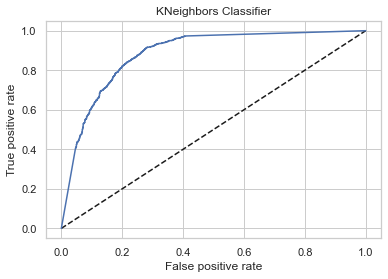

0.8107950189556516

In [116]:
#KNN
predknn_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predknn_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNeighbors Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighbors Classifier')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

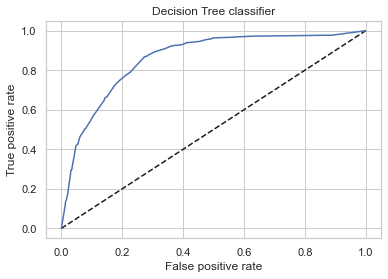

0.7935831821405834

In [114]:
#Decision tree
preddtc_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,preddtc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

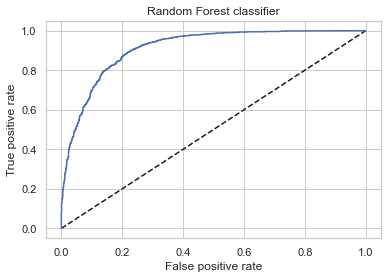

0.8341557326746492

In [115]:
#Random Forest
predrfc_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predrfc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

The KNeighbors model Accuracy score and cross validation score is 81%.

The Random Forest model Accuracy score and cross validation score is 83%.

The Decision tree model Accuracy score and cross validation score is 79%.

The Random Forest model gives the best result with accuracy score of 83%.

In [120]:
import pickle
filename="Census Income.pkl"
pickle.dump(rfc,open(filename, 'wb'))

Conclusion

In [121]:
model=pickle.load(open("Census Income.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  83.44279294849638
